## **The Importance of Data Cleaning in Data Science**

In the modern era of technology and information, **data** has become one of the most valuable assets. Whether it is used in business decision-making, scientific research, or technological innovation, the value of data lies in its **accuracy, consistency, and reliability**. This is where **data cleaning**, a fundamental step in the data science workflow, plays a crucial role. It is the process of identifying and correcting (or removing) errors and inconsistencies in datasets to ensure the quality and integrity of the data used for analysis.

### **Why Data Cleaning Matters**

#### **1. Ensures Data Quality and Integrity**

Raw data is often collected from multiple sources such as sensors, surveys, social media, or transactions. As a result, it is common to encounter **missing values, duplicate records, inconsistent formats**, and **incorrect entries**. If such issues are not addressed, the entire analysis or predictive model may be compromised. Clean data ensures that the output of data analysis accurately reflects reality and not the errors in data collection.

#### **2. Enhances Model Accuracy and Performance**

In data science, especially in **machine learning and artificial intelligence**, models are trained on historical data to make predictions. If this training data contains noise or inaccuracies, the model will learn incorrect patterns. **Data cleaning improves the performance of algorithms**, making them more accurate, efficient, and reliable. It helps in reducing overfitting, improving generalization, and increasing the trustworthiness of the model’s output.

#### **3. Prevents Misleading Insights**

Poor-quality data can lead to **misinterpretation** of results. For instance, an incorrectly labeled category or an outlier in numerical data may skew the entire analysis, leading to flawed conclusions. Clean data ensures that insights drawn from analysis are **valid, consistent, and actionable**, thereby supporting better decision-making.

#### **4. Saves Time and Resources**

While data cleaning may seem time-consuming, it **saves time in the long run**. If not addressed early, data quality issues can surface during analysis or model deployment stages, causing delays and requiring rework. A clean dataset allows analysts and data scientists to work more efficiently and focus on deriving meaningful insights rather than constantly fixing issues.

### **Common Data Cleaning Tasks**

Some of the standard practices in data cleaning include:

* **Handling missing values** (e.g., imputation or removal)
* **Detecting and removing duplicates**
* **Standardizing formats** (e.g., date and time formats)
* **Correcting data types**
* **Filtering out outliers**
* **Normalizing or transforming data**

These tasks are not just technical operations but are essential for maintaining **data integrity and analytical reliability**.

### **Conclusion**

To conclude, **data cleaning is an indispensable component of data science**. It ensures that the data used in analysis and modeling is accurate, consistent, and usable. Without proper data cleaning, even the most advanced algorithms can produce flawed results. As the saying goes in the data science community: *“Garbage in, garbage out.”* Clean data forms the backbone of effective data-driven decision-making and underpins the success of any data science project. For any data professional, mastering the art of data cleaning is not just a skill—it's a necessity.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
5725,Toyota,Highlander Hybrid,2015,regular unleaded,280.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hybrid",Midsize,4dr SUV,28,27,2031,47850
2556,Honda,Civic,2015,natural gas,110.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Sedan,38,27,2202,26740
4049,Suzuki,Equator,2012,regular unleaded,152.0,4.0,MANUAL,rear wheel drive,4.0,NaN,Compact,Extended Cab Pickup,23,19,481,17899
3694,Mercedes-Benz,E-Class,2016,premium unleaded (required),577.0,8.0,AUTOMATIC,all wheel drive,4.0,"Factory Tuner,Luxury,High-Performance",Midsize,Sedan,22,15,617,101700
1512,Cadillac,ATS Coupe,2016,premium unleaded (recommended),272.0,4.0,AUTOMATIC,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,31,22,1624,37995


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

## Data Cleaning

In [6]:
df['Engine Fuel Type'].value_counts()

Engine Fuel Type
regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: count, dtype: int64

In [7]:
#combine premium unleaded required & recommended
premium_type=[
    "premium unleaded (required)",
    "premium unleaded (recommended)"   
]

df.loc[df["Engine Fuel Type"].isin(premium_type),"Engine Fuel Type"]="Premium Unleaded"

In [8]:
#combine all premium flex fuels
df.loc[df["Engine Fuel Type"].isin(["flex-fuel (premium unleaded required/E85)","flex-fuel (premium unleaded recommended/E85)",]),"Engine Fuel Type"]="Premium Flex-fuel"

In [9]:
#updating name of regular flex-fuel
df.loc[df["Engine Fuel Type"].isin(["flex-fuel (unleaded/E85)"]),"Engine Fuel Type"]="Regular Flex-fuel"

In [10]:
#combine all natural gas
df.loc[df['Engine Fuel Type'].isin(["flex-fuel (unleaded/natural gas)","natural gas"]),'Engine Fuel Type']='Natural Gas'

In [11]:
df['Engine Fuel Type'].value_counts()

Engine Fuel Type
regular unleaded     7172
Premium Unleaded     3532
Regular Flex-fuel     899
diesel                154
Premium Flex-fuel      80
electric               66
Natural Gas             8
Name: count, dtype: int64

In [12]:
#fill missing values in 'Engine Fuel Type' using mode
df["Engine Fuel Type"]=df["Engine Fuel Type"].fillna(df["Engine Fuel Type"].mode()[0])

In [13]:
#fill missing values in 'Engine HP' with mean
df["Engine HP"]=df["Engine HP"].fillna(df["Engine HP"].mean())

In [14]:
df["Engine Cylinders"].value_counts()

Engine Cylinders
4.0     4752
6.0     4489
8.0     2031
12.0     230
5.0      225
10.0      68
0.0       56
3.0       30
16.0       3
Name: count, dtype: int64

In [15]:
#change Engine Cylinders to int type and fill missing values using mode 
df["Engine Cylinders"]=df["Engine Cylinders"].fillna(df["Engine Cylinders"].mode()[0]).astype(int)

In [16]:
#some have 0 Cylinder so remove that rows
df = df.drop(df[df["Engine Cylinders"]==0].index)


In [17]:
df["Transmission Type"].value_counts()

Transmission Type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
UNKNOWN               19
DIRECT_DRIVE          12
Name: count, dtype: int64

In [18]:
#Get the mode of Transmission Type for each Model (may return multiple modes)
model_mode_trans=df[df["Transmission Type"]!="UNKNOWN"].groupby("Model")["Transmission Type"].agg(lambda x:x.mode().iloc[0])

#Fill UNKNOWN by mapping the mode per Model
df.loc[df["Transmission Type"]=="UNKNOWN","Transmission Type"]=df.loc[df["Transmission Type"]=="UNKNOWN","Model"].map(model_mode_trans)

#If any UNKNOWN remain (e.g., model not found), fill with default 'AUTOMATIC'
df["Transmission Type"]=df["Transmission Type"].fillna("AUTOMATIC")

In [19]:
df["Transmission Type"].value_counts()

Transmission Type
AUTOMATIC           8275
MANUAL              2945
AUTOMATED_MANUAL     626
DIRECT_DRIVE          12
Name: count, dtype: int64

In [20]:
df["Driven_Wheels"].value_counts()

Driven_Wheels
front wheel drive    4753
rear wheel drive     3360
all wheel drive      2342
four wheel drive     1403
Name: count, dtype: int64

In [21]:
# Combine 'all wheel drive' and 'four wheel drive' into 'all-4 wheel drive' beacuse they are same
df.loc[df["Driven_Wheels"].isin(["all wheel drive","four wheel drive"]),"Driven_Wheels"]="all-4 wheel drive"

In [22]:
df["Number of Doors"].value_counts()

Number of Doors
4.0    8305
2.0    3157
3.0     395
Name: count, dtype: int64

In [23]:
#fill the null values using mode and conveting them into integer
df["Number of Doors"]=df["Number of Doors"].fillna(df["Number of Doors"].mode()[0]).astype(int)

In [24]:
def safe_mode(series):
    m = series.mode()
    return m.iloc[0] if not m.empty else np.nan

#mapping references
model_map = df.groupby('Model')['Market Category'].agg(safe_mode)
make_body_map = df.groupby(['Make', 'Vehicle Style'])['Market Category'].agg(safe_mode)
make_map = df.groupby('Make')['Market Category'].agg(safe_mode)

In [25]:
#here to fill category null values we use the concept in which we took the 
def fill_market_category(row):
    if pd.isna(row['Market Category']):
        # Try Model
        val=model_map.get(row['Model'], np.nan)
        if pd.isna(val):
            # Try Make + Vehicle Style
            val=make_body_map.get((row['Make'],row['Vehicle Style']), np.nan)
        if pd.isna(val):
            # Try Make only
            val = make_map.get(row['Make'], np.nan)
        if pd.isna(val):
            # Fallback to 'Other'
            val='Other'
        return val
    return row['Market Category']

df['Market Category']=df.apply(fill_market_category, axis=1)

here we perform interesting function to fill null values in market category

This code fills missing values in the 'Market Category' column using a priority-based mapping. It first tries to fill based on the most common value (mode) for the same Model, then by Make + Vehicle Style, then by Make alone. If none match, it assigns 'Other' as a fallback.

In [26]:
df['Market Category'].isnull().sum()

np.int64(0)

In [27]:
df.duplicated().sum()

np.int64(722)

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

Rename all columns for better visualization

In [30]:
df.rename(columns={
    'Make':'Brand',
    'Engine Fuel Type':'Fuel_Type',
    'Engine HP':'Horsepower',
    'Engine Cylinders':'Cylinders',
    'Transmission Type':'Transmission',
    'Driven_Wheels':'Drive_Type',
    'Number of Doors':'Doors',
    'Market Category':'Market_Category',
    'Vehicle Size':'Vehicle_Size',
    'Vehicle Style':'Vehicle_Style',
    'highway MPG':'Highway_MPG',
    'city mpg':'city_mpg',
    'MSRP':'Price'
}, inplace=True)

## Data Visualization & Analysis

Here We plot the histogram and box plot of every numerical values of this data to see their distribution

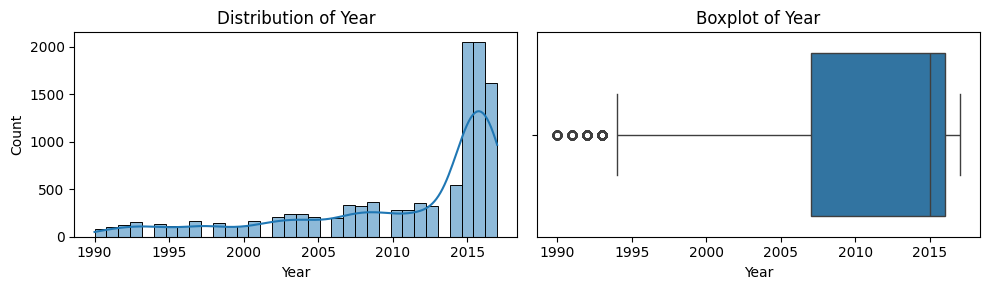

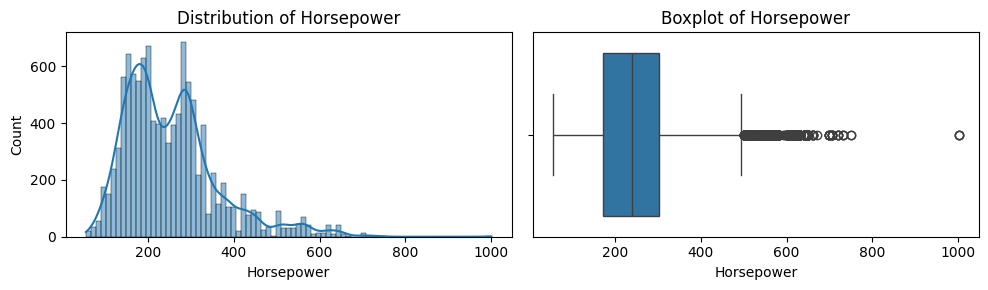

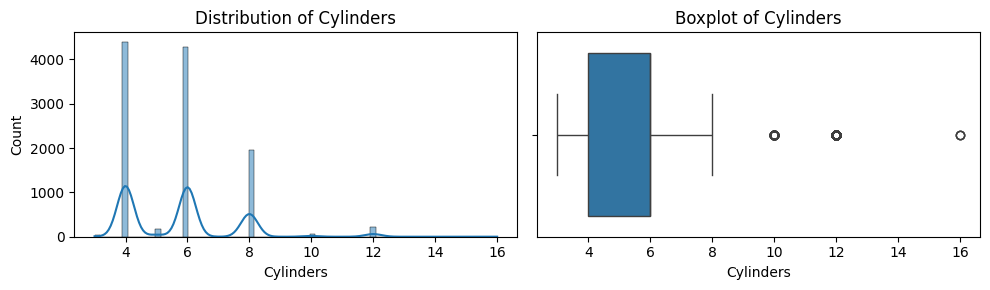

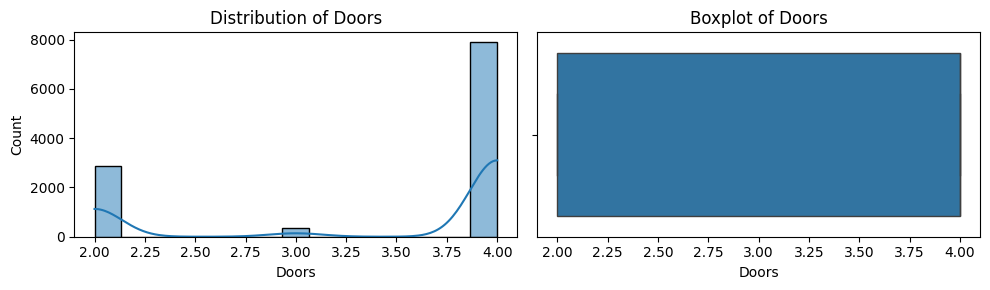

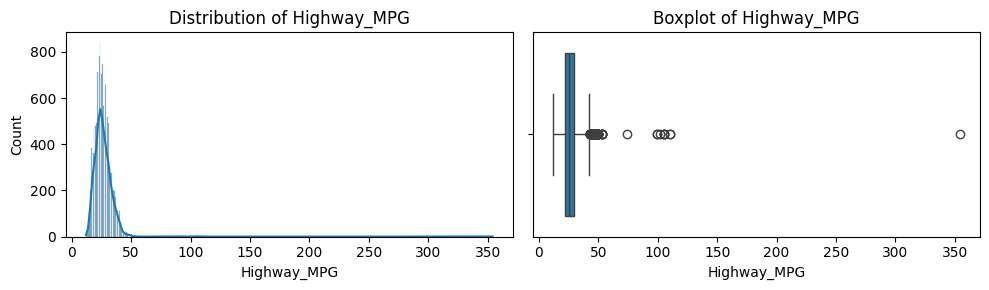

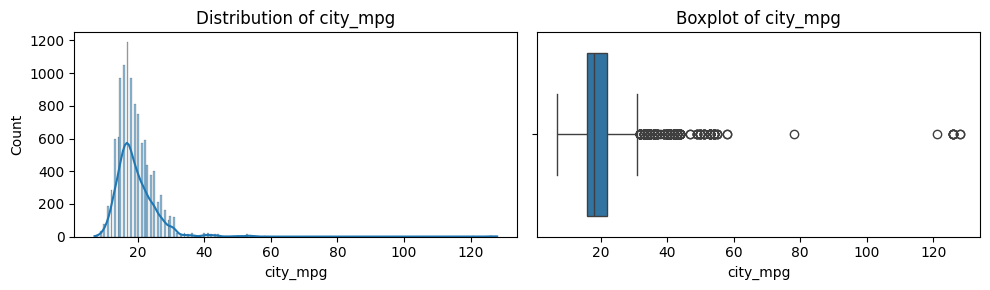

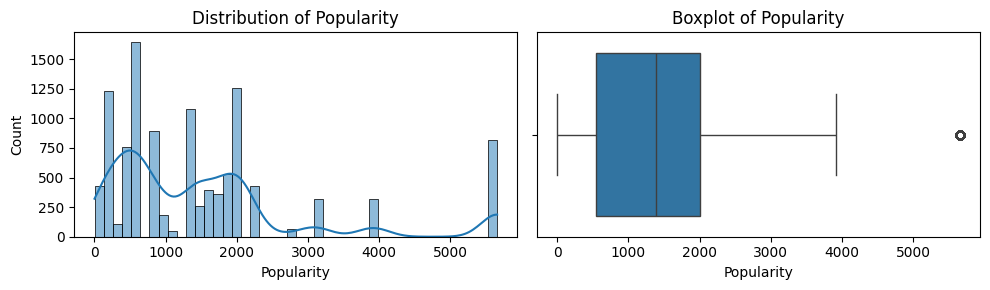

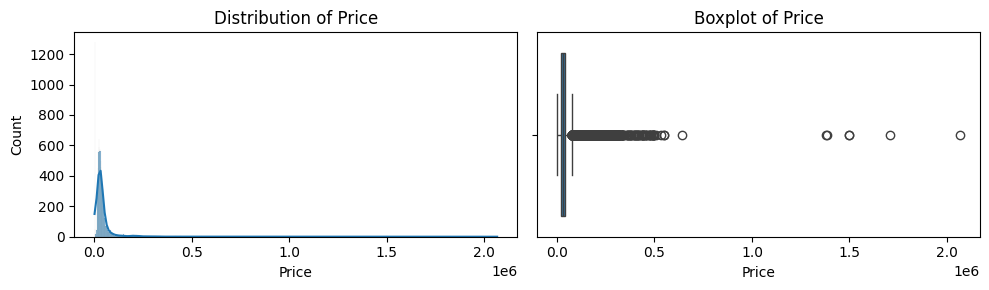

In [31]:
numerical_cols=df.select_dtypes(include=['int64','float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(10,3))
    
    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}')
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()


Here by this all plots,
- year: car sell increased from 2005
- horsepower: most cars have the horsepower between 170 to 300
- highway mpg: most cars have highway mpg between 20 to 37
- city mpg; most cars have city mpg between 15 to 30

here we plot countplot for every categorical columns of data

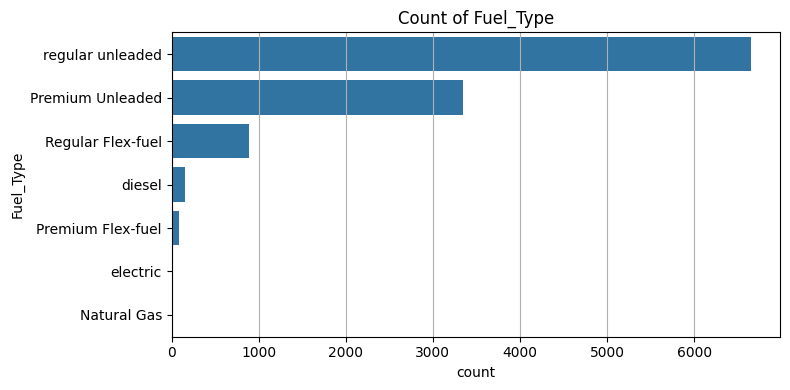

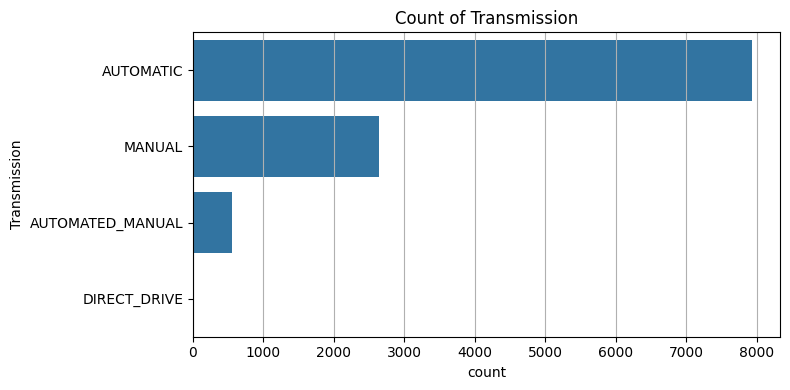

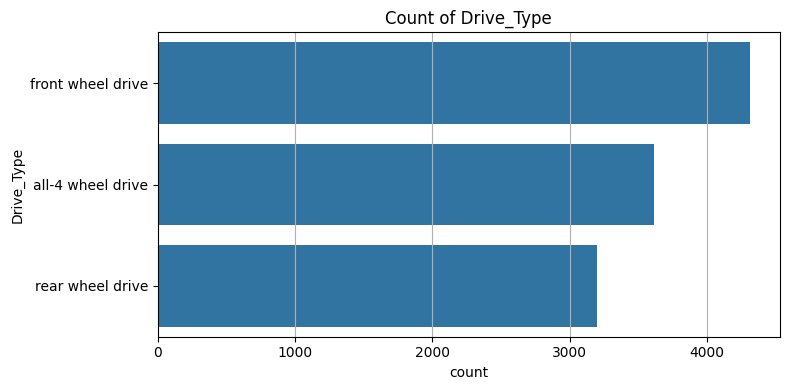

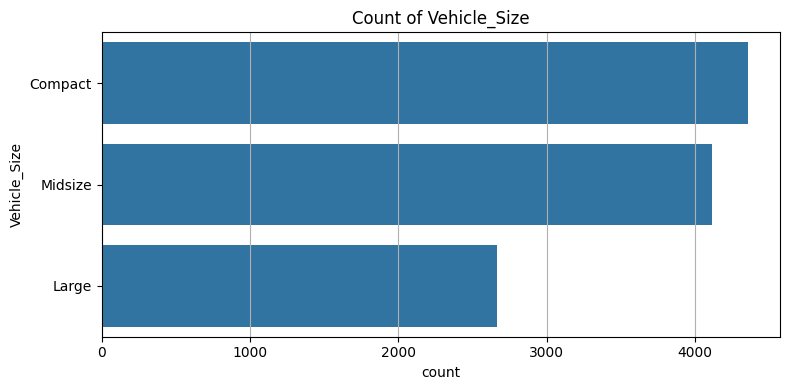

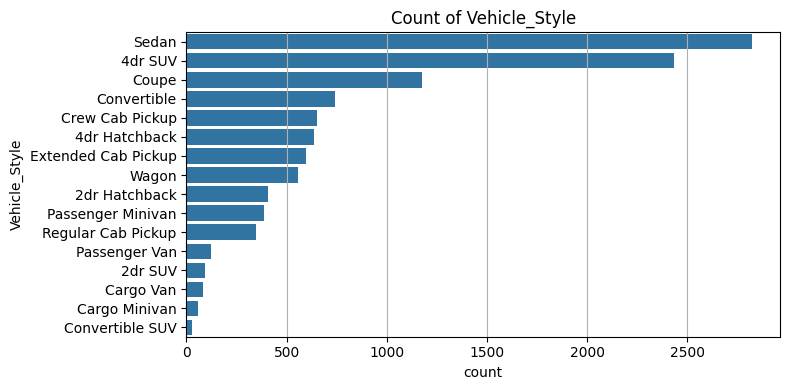

In [32]:
categorical_cols=df.select_dtypes(include='object').columns
exclude_cols=['Model','Brand','Market_Category'] #here we exclude Model, Brand and Market_Category as they have too many unique values
categorical_cols=[col for col in categorical_cols if col not in exclude_cols]

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col,data=df,order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()


from above graphs we can conclude that:
- mostly all cars use regular & premium unleaded fuel.
- here most cars are automatic and then on 2nd number manual cars.
- Drive types have almost same counts, all 4 wheel drive has little more counts.
- In  vehicle size Compact and mid size counts are almost same but large size have little less counts
- here from count of vehicle style we can see that popular vehicle styles are sedan and 4dr SUV


In [33]:
df['Car_Age']=2025-df['Year'] #Adjust to current year to find the age of car
df['MPG_Avg']=(df['city_mpg']+df['Highway_MPG'])/2 #calculate average mpg from city & highway mpg

#price binning
df['Price_Level']=pd.qcut(df['Price'],q=3,labels=['Low','Mid','High'])

In [34]:
df.head()

,Brand,Model,Year,Fuel_Type,Horsepower,Cylinders,Transmission,Drive_Type,Doors,Market_Category,Vehicle_Size,Vehicle_Style,Highway_MPG,city_mpg,Popularity,Price,Car_Age,MPG_Avg,Price_Level
0,BMW,1 Series M,2011,Premium Unleaded,335.0,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,14,22.5,High
1,BMW,1 Series,2011,Premium Unleaded,300.0,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,14,23.5,High
2,BMW,1 Series,2011,Premium Unleaded,300.0,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,14,24.0,Mid
3,BMW,1 Series,2011,Premium Unleaded,230.0,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,14,23.0,Mid
4,BMW,1 Series,2011,Premium Unleaded,230.0,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500,14,23.0,Mid


here we plot countplots of every categorical columns but comparing it with price levels(low,mid and high)

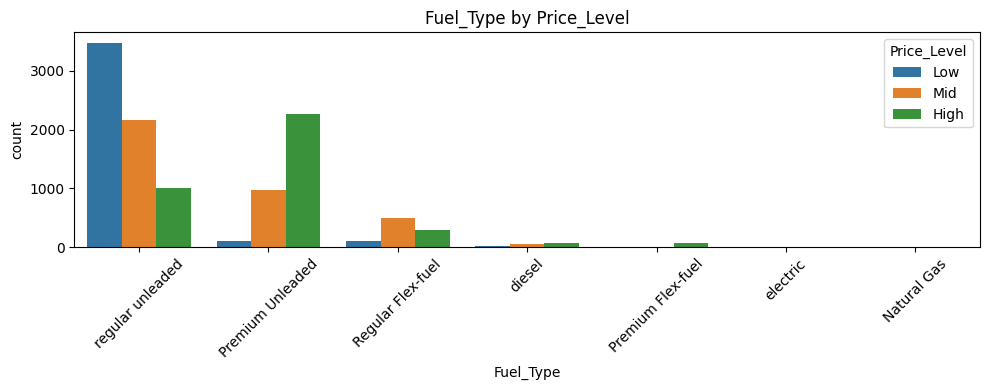

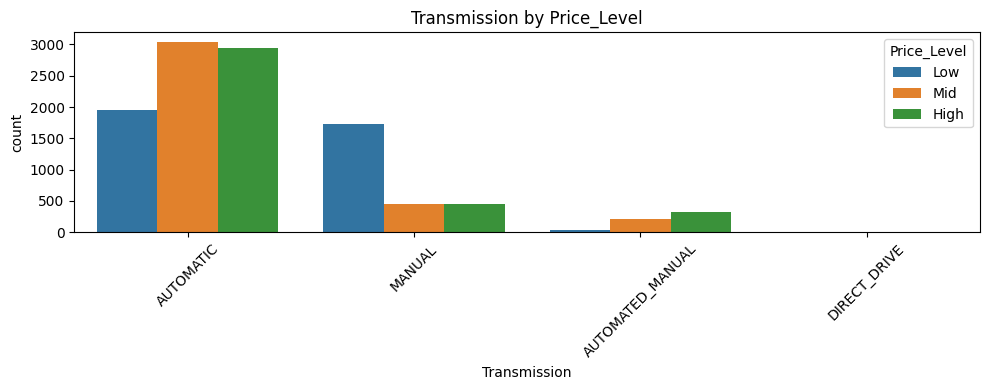

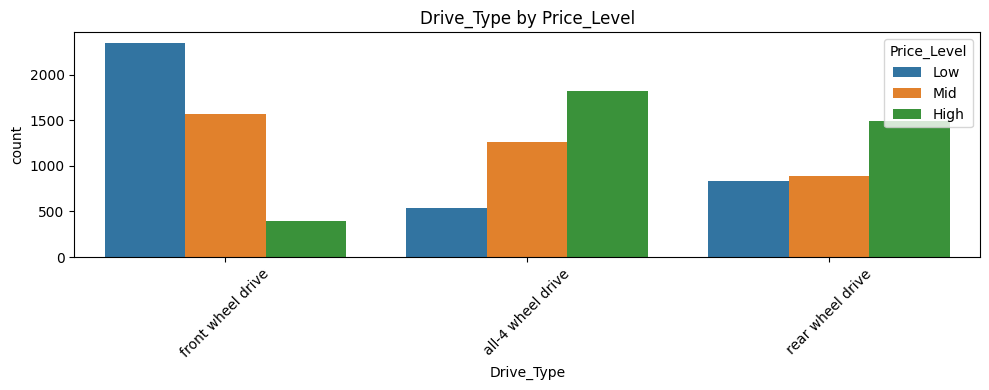

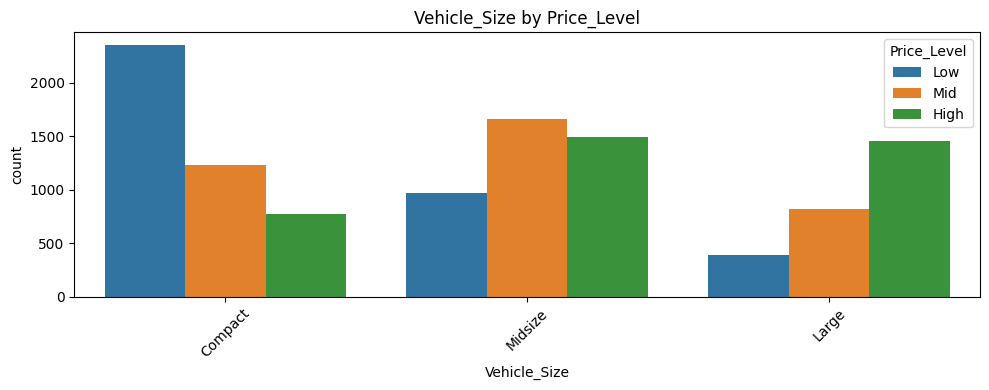

In [35]:
categorical_cols=df.select_dtypes(include='object').columns
exclude_cols=['Model','Brand','Market_Category'] #here we exclude the Model, Brand and Market_Category as they have too many unique values
categorical_cols=[col for col in categorical_cols if col not in exclude_cols]

for col in categorical_cols[:-1]:  # Skip Price_Level itself
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, hue='Price_Level', data=df, order=df[col].value_counts().index[:10])
    plt.xticks(rotation=45)
    plt.title(f'{col} by Price_Level')
    plt.tight_layout()
    plt.show()


from above graphs we can conclude that,
- brand by price level : Cadillac sells more high price cars, chevrolet sells more low price cars 
- Model by Price level : Silverado 1500, tundra, f-150, Sierra1500 and corvette models have only mid and high priced cars
- most low priced cars use regular unleaded and high priced cars use premium unleaded fuel
- most of the cars are automatic

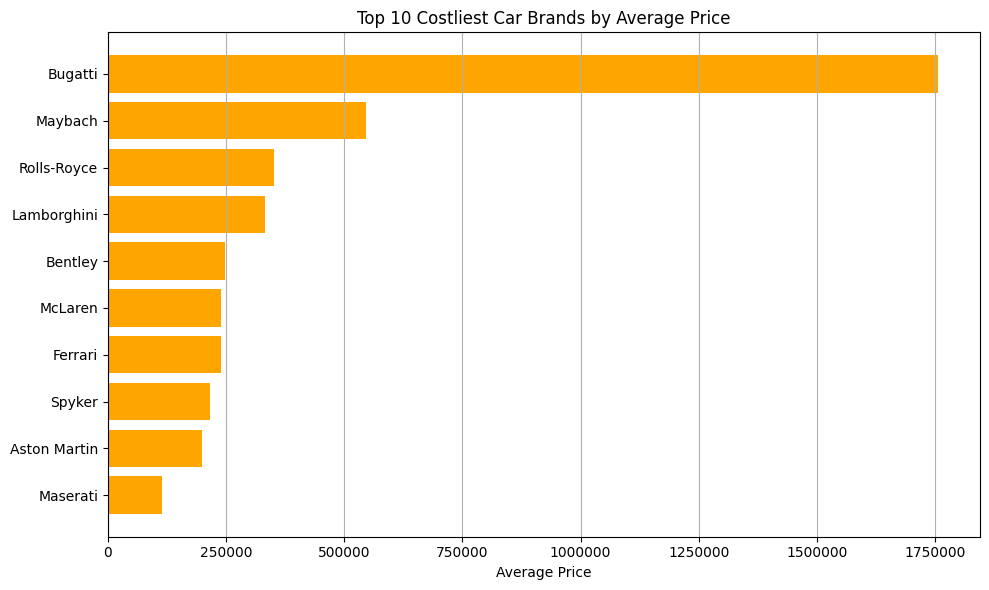

In [36]:

# Group by Make and take top 10 by average Price
top_10 = df.groupby('Brand')['Price'].mean().sort_values(ascending=False).head(10)

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(top_10.index, top_10.values, color='orange')
plt.xlabel('Average Price')
plt.title('Top 10 Costliest Car Brands by Average Price')
plt.gca().invert_yaxis()  # optional: most expensive at top
plt.ticklabel_format(style='plain', axis='x')  # for X-axis
plt.tight_layout()
plt.grid(axis='x')
plt.show()


here we plot the highest priced brands based on average price of that brand 

we can see that Bugatti brand is highest priced brand with average value around $1750000

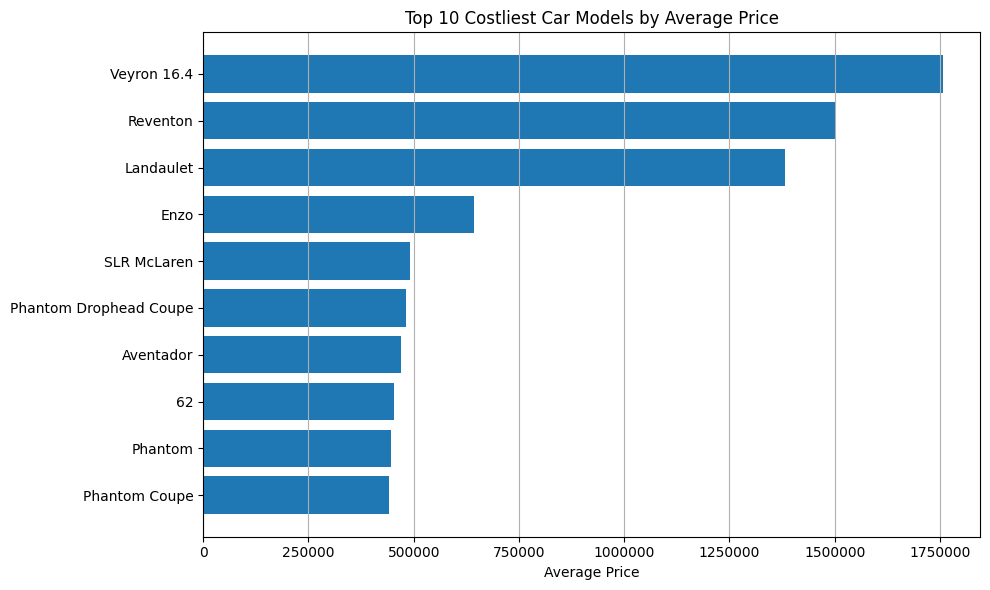

In [37]:
# Group by Make and take top 10 by average MSRP
top_10 = df.groupby('Model')['Price'].mean().sort_values(ascending=False).head(10)

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(top_10.index, top_10.values)
plt.xlabel('Average Price')
plt.title('Top 10 Costliest Car Models by Average Price')
plt.gca().invert_yaxis()  # optional: most expensive at top
plt.ticklabel_format(style='plain', axis='x')  # for X-axis
plt.grid(axis='x')
plt.tight_layout()
plt.show()

here we plot the highest priced model based on average price of that model 

we can see that Veyron 16.4, Reventon, Landaulet are  highest priced models with average value between $1370000 & $1750000.

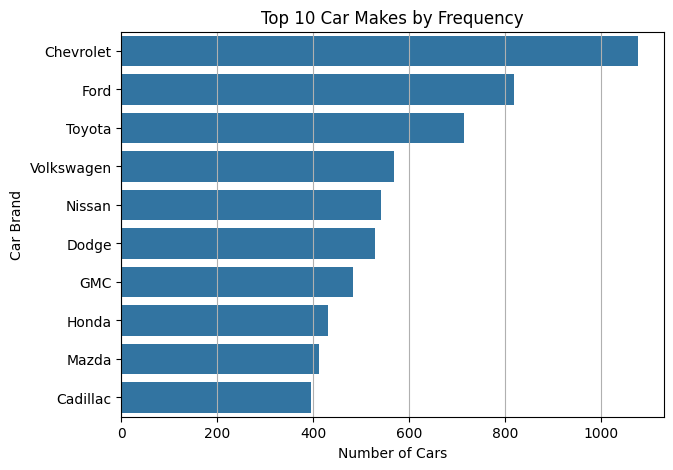

In [38]:
# Count top 10 car makes
top_10_makes=df['Brand'].value_counts().head(10)

plt.figure(figsize=(7,5))
sns.barplot(x=top_10_makes.values,y=top_10_makes.index)
plt.title('Top 10 Car Makes by Frequency')
plt.xlabel('Number of Cars')
plt.ylabel('Car Brand')
plt.grid(True,axis='x')
plt.show()

here we plot barplot of top 10 car brands 
- Chevrolet has highest number of cars around 1100
- ford has around 820

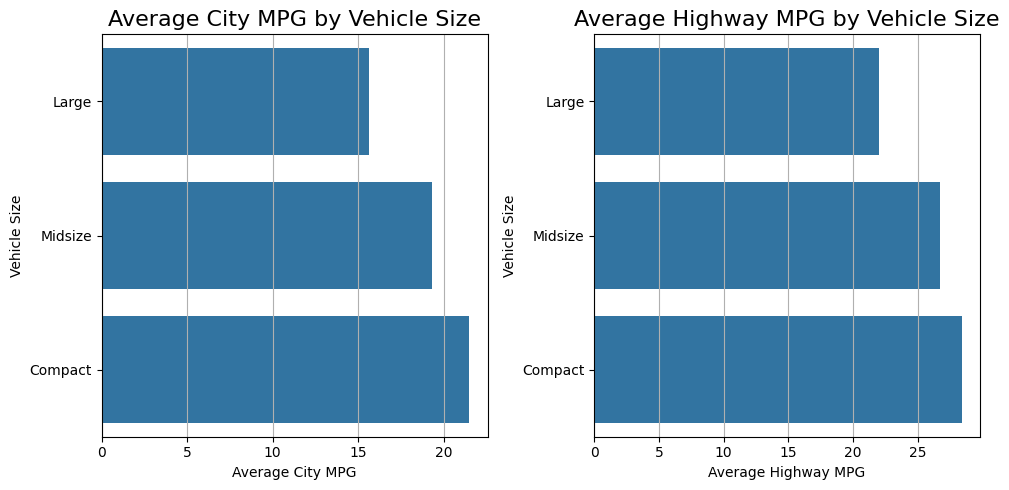

In [39]:
city_mpg_by_size=df.groupby('Vehicle_Size')['city_mpg'].mean().sort_values()
highway_mpg_by_size=df.groupby('Vehicle_Size')['Highway_MPG'].mean().sort_values()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x=city_mpg_by_size.values, y=city_mpg_by_size.index)
plt.title('Average City MPG by Vehicle Size', fontsize=16)
plt.xlabel('Average City MPG')
plt.ylabel('Vehicle Size')
plt.grid(True,axis='x')

plt.subplot(1,2,2)
sns.barplot(x=highway_mpg_by_size.values, y=highway_mpg_by_size.index)
plt.title('Average Highway MPG by Vehicle Size', fontsize=16)
plt.xlabel('Average Highway MPG')
plt.ylabel('Vehicle Size')
plt.grid(True,axis='x')

plt.tight_layout()
plt.show()

here we plot barplot for City mpg and highway mpg ,comparing them with vehicle_size
- we can see here that compact size car has more MPG in Both city & Highway around 22 and 27 respectively

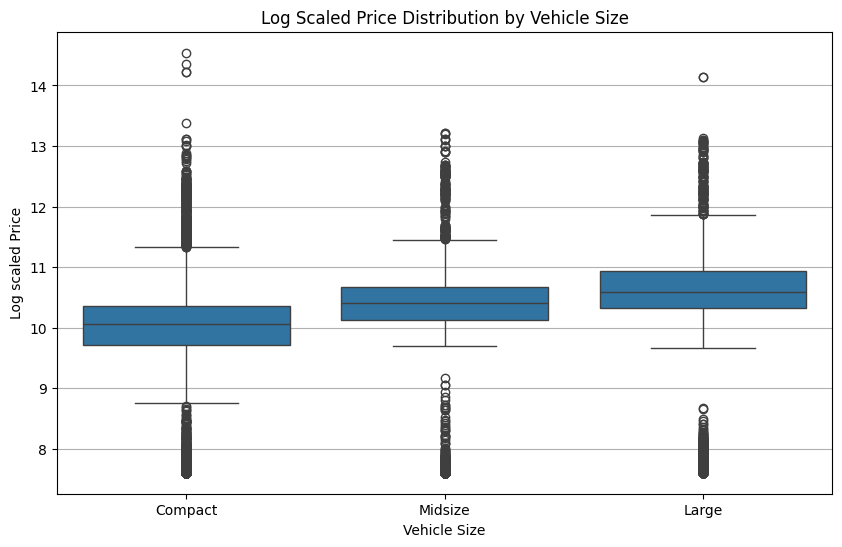

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,x='Vehicle_Size',y=np.log1p(df['Price']))

plt.title('Log Scaled Price Distribution by Vehicle Size')
plt.xlabel('Vehicle Size')
plt.ylabel('Log scaled Price')
plt.grid(True, axis='y')
plt.show()

- Compact vehicles have the lowest median price
- Midsize vehicles sit in the middle range
- Large vehicles have the highest prices and a wider interquartile spread

This trend confirms that larger cars are generally more expensive, likely due to increased materials, engine power, and premium features.

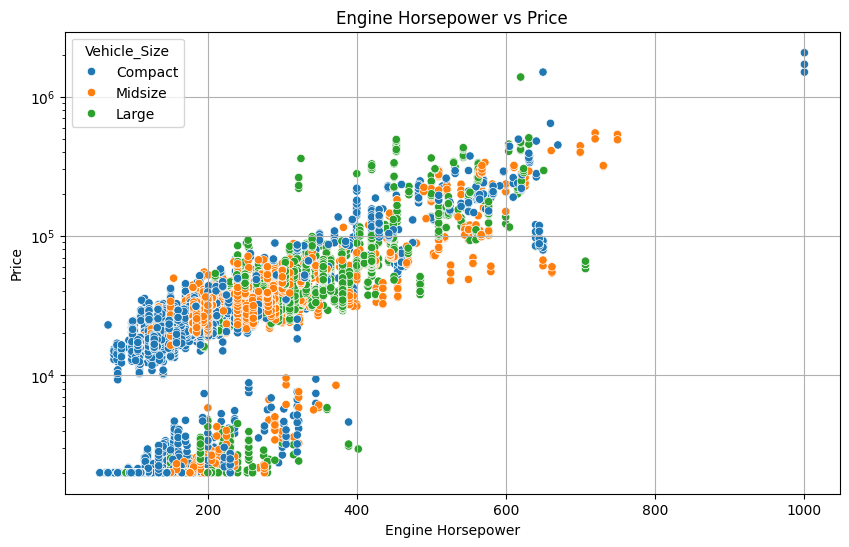

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Horsepower',y='Price',data=df,hue='Vehicle_Size')

plt.yscale('log')  # log scale for price to prevent extreme values from skewing the plot
plt.title('Engine Horsepower vs Price')
plt.xlabel('Engine Horsepower')
plt.ylabel('Price')
plt.grid(True)
plt.show()

- Engine HP is positively correlated with price (MSRP) → Cars with higher horsepower generally command higher prices — as expected.
- Vehicle Size clusters are clearly visible:
    1. Compact cars (blue) dominate the lower HP and price ranges, clustering around 100–250 HP.
    2. Midsize cars (orange) span a broader band — from affordable to high-performance, suggesting more versatility in this segment.
    3. Large cars (green) tend to appear more as HP increases, especially in the 400+ HP range, aligning with luxury or heavy vehicles.

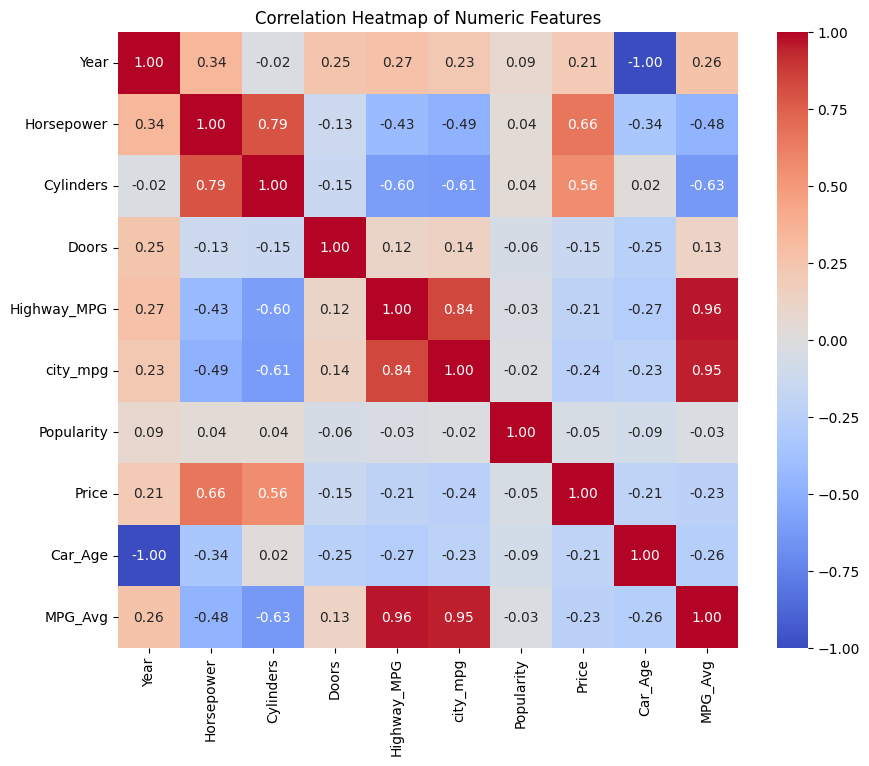

In [42]:
numeric_df = df.select_dtypes(include='number')

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap of Numeric Features')
plt.show()

Strong Positive Correlations::
- Horsepower & Cylinders : 0.79  beacause higher horsepower engines usually have more cylinders.
- Horsepower & Price : 0.66 because more powerful engines are usually found in costlier vehicles.
- city_mpg & highway_mpg : 0.84 because Cars efficient in cities are also efficient on highways.
- Cylinders & Price : 0.56 becasue as more cylinders required for more horsepower cars which are costlier.

Strong Negative Correlations::
- Engine Cylinders & highway MPG, city mpg : -0.60, -0.61 because More cylinders typically lead to lower fuel efficiency.
- Engine Horsepower & MPG (city & highway) : -0.43 to -0.49 because More power generally means more fuel consumption.


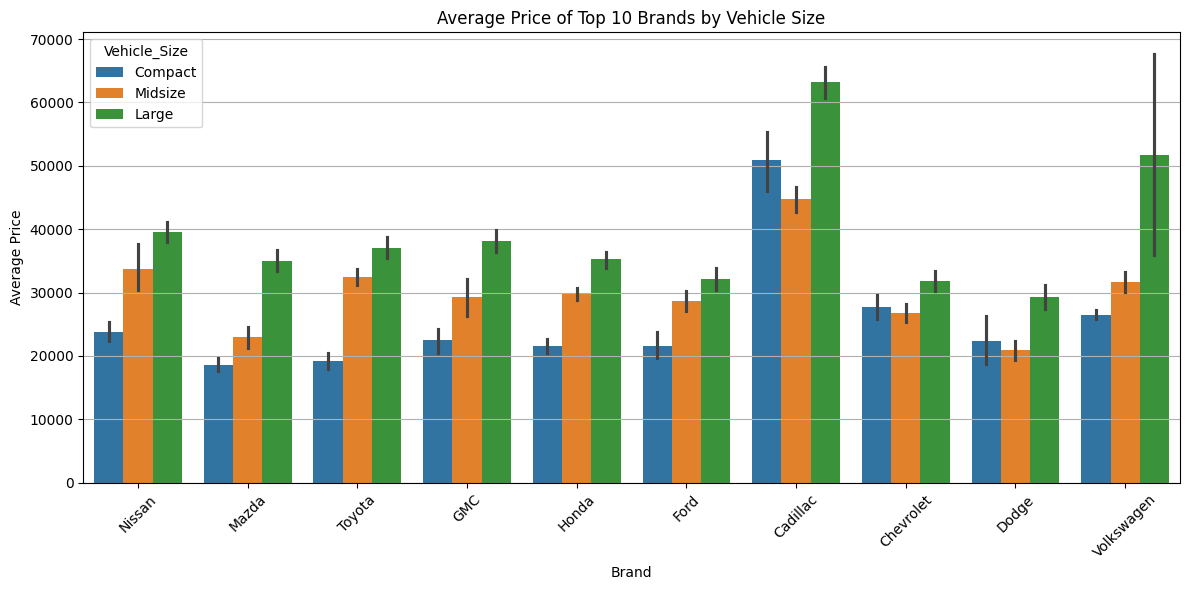

In [43]:
top_brands=df['Brand'].value_counts().head(10).index

filtered_df=df[df['Brand'].isin(top_brands)]
plt.figure(figsize=(12,6))
sns.barplot(data=filtered_df,x='Brand',y='Price',hue='Vehicle_Size',estimator=np.mean)
plt.title('Average Price of Top 10 Brands by Vehicle Size')
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.xlabel('Brand')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

- Cadillac charges the most across all sizes , especially for large vehicles, where the average Price exceeds $60,000.
- Volkswagen shows a sharp jump for large vehicles, indicating a few high-end models in that segment.
- Chevrolet, Dodge, Honda and Ford offer relatively budget-friendly pricing across all sizes, with only slight increases for larger cars.
- GMC show consistent pricing increases from compact to midsize to large, reflecting tiered product strategies.
- Mazda and Toyota offer affordable compact size cars under $20,000.

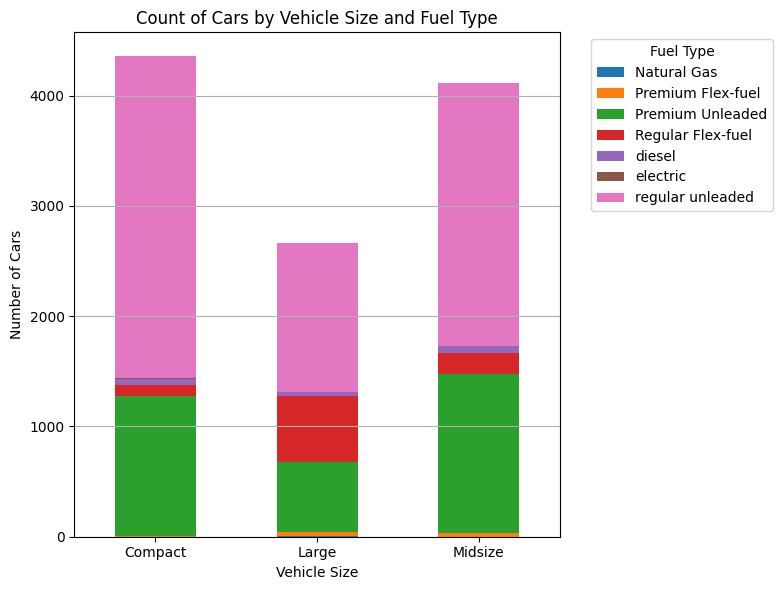

In [44]:
size_fuel_counts = df.groupby(['Vehicle_Size','Fuel_Type']).size().unstack().fillna(0)

# Step 2: Plot as stacked bar
size_fuel_counts.plot(kind='bar',stacked=True,figsize=(8,6))
plt.title('Count of Cars by Vehicle Size and Fuel Type')
plt.xlabel('Vehicle Size')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0)
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

- Compact vehicles are the most common overall, and heavily dominated by regular unleaded fuel.
- Midsize vehicles also rely mainly on regular and premium unleaded, with a noticeable presence of natural gas and flex-fuel variants.
- Large vehicles show a higher share of regular flex-fuel and premium fuel types, reflecting more powerful engine needs.

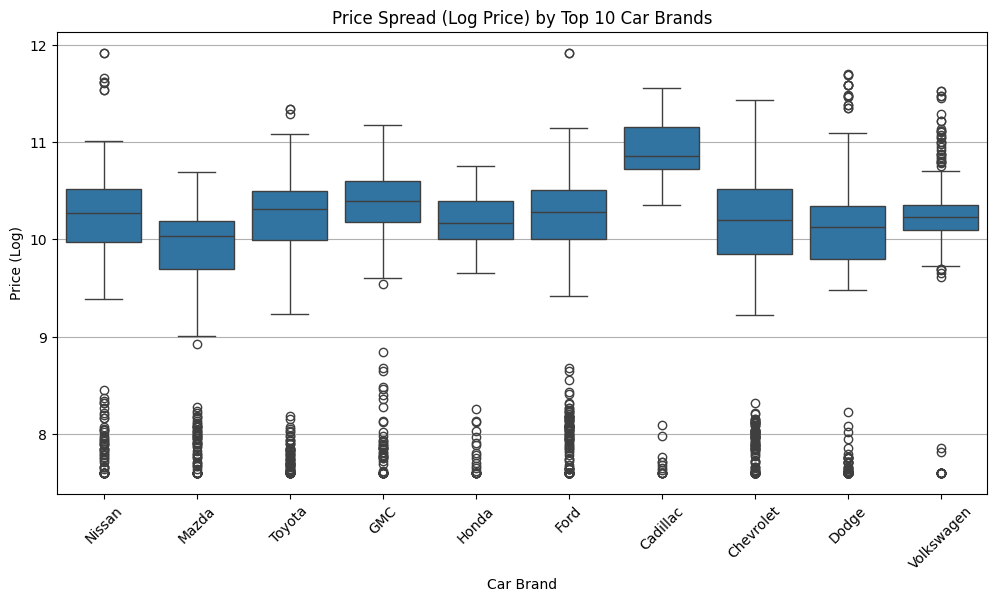

In [45]:
top_10_makes=df['Brand'].value_counts().head(10).index
filtered_df=df[df['Brand'].isin(top_10_makes)]

plt.figure(figsize=(12,6))
sns.boxplot(x='Brand', y=np.log1p(filtered_df['Price']), data=filtered_df)
plt.title('Price Spread (Log Price) by Top 10 Car Brands')
plt.xlabel('Car Brand')
plt.ylabel('Price (Log)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

This plot shows that Cadillac leads in premium pricing, while brands like Mazda, Dodge, and Volkswagen dominate the value segment, and Ford, Toyota, and GMC span a wide range to appeal to multiple markets.

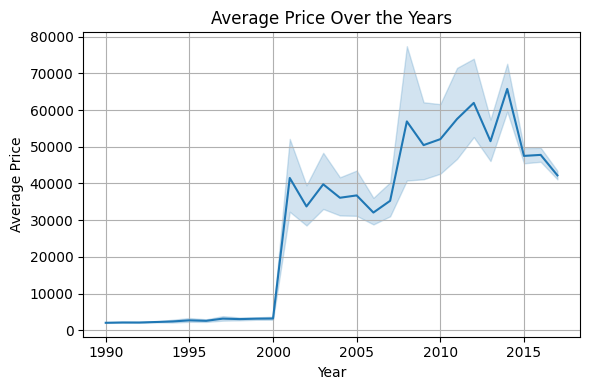

In [46]:
plt.figure(figsize=(6,4))
sns.lineplot(data=df,x='Year',y='Price',estimator='mean')
plt.title('Average Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.tight_layout()
plt.show()


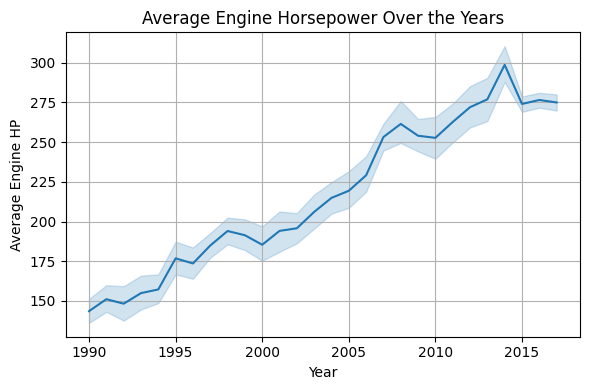

In [47]:
plt.figure(figsize=(6,4))
sns.lineplot(data=df,x='Year',y='Horsepower',estimator='mean')
plt.title('Average Engine Horsepower Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Engine HP')
plt.grid(True)
plt.tight_layout()
plt.show()


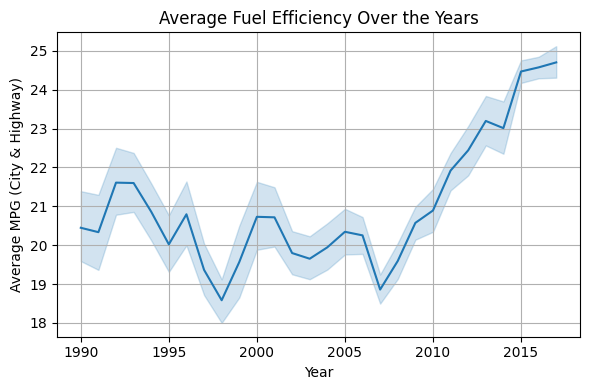

In [48]:
plt.figure(figsize=(6,4))
sns.lineplot(data=df,x='Year',y='MPG_Avg',estimator='mean')
plt.title('Average Fuel Efficiency Over the Years')
plt.xlabel('Year')
plt.ylabel('Average MPG (City & Highway)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Insights

from the above all numerical columns distribution graphs shows that:
- year: car sell increased from 2005
- horsepower: most cars have the horsepower between 170 to 300
- highway mpg: most cars have highway mpg between 20 to 37
- city mpg; most cars have city mpg between 15 to 30

from the above all countplots of categorical columns we can conclude that
- mostly all cars use regular & premium unleaded fuel.
- here most cars are automatic and then on 2nd number manual cars.
- Drive types have almost same counts, all 4 wheel drive has little more counts.
- In  vehicle size Compact and mid size counts are almost same but large size have little less counts
- here from count of vehicle style we can see that popular vehicle styles are sedan and 4dr SUV

from plotting countplot of every countplot but comparing it with price level we can conclude that
- brand by price level : Cadillac sells more high price cars, chevrolet sells more low price cars 
- Model by Price level : Silverado 1500, tundra, f-150, Sierra1500 and corvette models have only mid and high priced cars
- most low priced cars use regular unleaded and high priced cars use premium unleaded fuel
- most of the cars are automatic

by ploting the highest priced brands based on average price of that brand ,
we can see that Bugatti brand is highest priced brand with average value around $1750000

by ploting the highest priced model based on average price of that model ,
we can see that Veyron 16.4, Reventon, Landaulet are  highest priced models with average value between $1370000 & $1750000.

here we plot barplot of top 10 car brands 
- Chevrolet has highest number of cars around 1100
- ford has around 820

here we plot barplot for City mpg and highway mpg ,comparing them with vehicle_size
- we can see here that compact size car has more MPG in Both city & Highway around 22 and 27 respectively

by plotting boxplots of log scaled price distribution by vehicle size we can conclude that, 
- Compact vehicles have the lowest median price
- Midsize vehicles sit in the middle range
- Large vehicles have the highest prices and a wider interquartile spread
- This trend confirms that larger cars are generally more expensive, likely due to increased materials, engine power, and premium features.

by scatter plot of Engine horsepower and price we can conclude that
- Engine HP is positively correlated with price (MSRP) → Cars with higher horsepower generally command higher prices — as expected.
- Vehicle Size clusters are clearly visible:
    1. Compact cars (blue) dominate the lower HP and price ranges, clustering around 100–250 HP.
    2. Midsize cars (orange) span a broader band — from affordable to high-performance, suggesting more versatility in this segment.
    3. Large cars (green) tend to appear more as HP increases, especially in the 400+ HP range, aligning with luxury or heavy vehicles.

from the above correlation heatmap we can got below informations:
1. Strong Positive Correlations::
- Horsepower & Cylinders : 0.79  beacause higher horsepower engines usually have more cylinders.
- Horsepower & Price : 0.66 because more powerful engines are usually found in costlier vehicles.
- city_mpg & highway_mpg : 0.84 because Cars efficient in cities are also efficient on highways.
- Cylinders & Price : 0.56 becasue as more cylinders required for more horsepower cars which are costlier.

2. Strong Negative Correlations::
- Engine Cylinders & highway MPG, city mpg : -0.60, -0.61 because More cylinders typically lead to lower fuel efficiency.
- Engine Horsepower & MPG (city & highway) : -0.43 to -0.49 because More power generally means more fuel consumption.

from the barplot of average price of top 10 brands by vehicle size we can conclude that
- Cadillac charges the most across all sizes , especially for large vehicles, where the average Price exceeds $60,000.
- Volkswagen shows a sharp jump for large vehicles, indicating a few high-end models in that segment.
- Chevrolet, Dodge, Honda and Ford offer relatively budget-friendly pricing across all sizes, with only slight increases for larger cars.
- GMC show consistent pricing increases from compact to midsize to large, reflecting tiered product strategies.
- Mazda and Toyota offer affordable compact size cars under $20,000.

by plotting staked countplot we can conclude that,
- Compact vehicles are the most common overall, and heavily dominated by regular unleaded fuel.
- Midsize vehicles also rely mainly on regular and premium unleaded, with a noticeable presence of natural gas and flex-fuel variants.
- Large vehicles show a higher share of regular flex-fuel and premium fuel types, reflecting more powerful engine needs.

by plotting boxplot for price spread by top 10 car brands, we can conclude that Cadillac leads in premium pricing, while brands like Mazda, Dodge, and Volkswagen dominate the value segment, and Ford, Toyota, and GMC span a wide range to appeal to multiple markets.

by plotting average price trend over the time we can see that prices of cars increases suddenly after year 2000 and increasing by the time. 

by plotting the average engine hp over the year we can see that engine hp is incrasing by the time.


